### Importing Libraries

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Calling Dataset

In [2]:
#reading dataset
ds_email=pd.read_csv("email.csv",encoding="latin-1")

ds_email

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


### Decribing Information

In [3]:
ds_email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


### Replacing Missing Values

In [4]:
#replacing null values in the subject column with the most frequent
for col in ["subject"]:
    
    ds_email[col].fillna(ds_email[col].mode()[0],inplace=True)  

### Checking Missing Values

In [5]:
#checking missing values
ds_email.isnull().sum()

subject    0
message    0
label      0
dtype: int64

### Checking Values Counts

In [6]:
#checking value counts
ds_email.label.value_counts()

0    2412
1     481
Name: label, dtype: int64

### Checking Ratios

In [7]:
#checking ratios
print("spam ratio =",round(len(ds_email[ds_email["label"]==1])/len(ds_email.label),2)*100,"%")

print("ham ratio =",round(len(ds_email[ds_email["label"]==0])/len(ds_email.label),2)*100,"%")

spam ratio = 17.0 %
ham ratio = 83.0 %


### Creating Columns

In [8]:
#creating new columns
ds_email["subject_length"]=ds_email.subject.str.len()

ds_email["message_length"]=ds_email.message.str.len()

ds_email

,subject,message,label,subject_length,message_length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,39,2856
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,16,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50,1435
3,risk,a colleague and i are researching the differin...,0,4,324
4,request book information,earlier this morning i was on the phone with a...,0,24,1046
...,...,...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1,28,262
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1,34,2163
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0,34,1039
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0,54,2949


### Converting Data to Lower Case

In [9]:
#converting to lower case
ds_email["subject"]=ds_email["subject"].str.lower()

ds_email["message"]=ds_email["message"].str.lower()

### Feature Engineering

In [10]:
#replacing email address with email
ds_email["message"]=ds_email["message"].str.replace(r"^.+@[^\.].*\.[a-z]{2,}$","emailaddress")

In [11]:
#replacing email address with email
ds_email["subject"]=ds_email["subject"].str.replace(r"^.+@[^\.].*\.[a-z]{2,}$","emailaddress")

In [12]:
#replace urls with webadress
ds_email["message"]=ds_email["message"].str.replace(r"^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$","webaddress")

In [13]:
#replace urls with webadress
ds_email["subject"]=ds_email["subject"].str.replace(r"^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$","webaddress")

In [14]:
#replacing money with money symbol
ds_email["message"]=ds_email["message"].str.replace(r"$","dollars")

In [15]:
#replacing money with money symbol
ds_email["subject"]=ds_email["subject"].str.replace(r"$","dollars")

In [16]:
#replacing 10 digit phone number
ds_email["message"]=ds_email["message"].str.replace(r"^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$","phonemumber")

In [17]:
#replacing 10 digit phone number
ds_email["subject"]=ds_email["subject"].str.replace(r"^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$","phonemumber")

In [18]:
#replace number with numbr
ds_email["message"]=ds_email["message"].str.replace(r"\d+(\.\d+)?","numbr")

In [19]:
#replace number with numbr
ds_email["subject"]=ds_email["subject"].str.replace(r"\d+(\.\d+)?","numbr")

In [20]:
#replacing punctuation
ds_email["message"]=ds_email["message"].str.replace(r"[^\w\d\s]"," ")

In [21]:
#replacing punctuation
ds_email["subject"]=ds_email["subject"].str.replace(r"[^\w\d\s]"," ")

In [22]:
#replacing blank space with single space
ds_email["message"]=ds_email["message"].str.replace(r"\s+"," ")

In [23]:
#replacing blank space with single space
ds_email["subject"]=ds_email["subject"].str.replace(r"\s+"," ")

In [24]:
#removing leading and trailing white space
ds_email["message"]=ds_email["message"].str.replace(r"^\s+?$"," ")

In [25]:
#removing leading and trailing white space
ds_email["subject"]=ds_email["subject"].str.replace(r"^\s+?$"," ")

### Removing Stopwords

In [26]:
#removing stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english")+["u","ur","4","2","im","dont","doin","ure"])

ds_email["message"]=ds_email["message"].apply(lambda x:" ".join(term for term in x.split() if term not in stop_words))

### Making New Columns

In [27]:
#new column clean_length
ds_email["message_length_new"]=ds_email.message.str.len()

ds_email["subject_length_new"]=ds_email.subject.str.len()

ds_email.head()

,subject,message,label,subject_length,message_length,message_length_new,subject_length_new
0,job posting apple iss research center,content length numbr apple iss research center...,0,39,2856,2179,37
1,sociolinguistics,lang classification grimes joseph e barbara f ...,0,16,1800,1454,16
2,query letter frequencies for text identification,posting inquiry sergei atamas satamas umabnet ...,0,50,1435,1064,48
3,risk,colleague researching differing degrees risk p...,0,4,324,210,4
4,request book information,earlier morning phone friend mine living south...,0,24,1046,629,24


### Displaying Length Removals

In [28]:
#total length removal
print("Message Original Length",ds_email.message_length.sum())

print("Message Clean Length",ds_email.message_length_new.sum())

print("Subject Original Length",ds_email.subject_length.sum())

print("Subject Clean Length",ds_email.subject_length_new.sum())

Message Original Length 9070005
Message Clean Length 6568010
Subject Original Length 92639
Subject Clean Length 89187


### Plotting Distribution of Original Length of Words

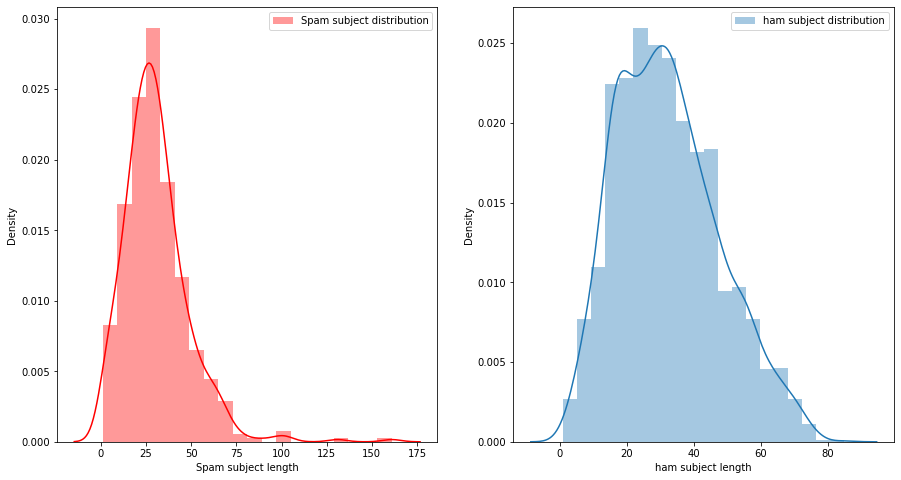

In [29]:
#plotting distribution of original subject length of words
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(ds_email[ds_email["label"]==1]["subject_length"],bins=20,ax=ax[0],label="Spam subject distribution",color="r")

ax[0].set_xlabel("Spam subject length")

ax[0].legend()

sns.distplot(ds_email[ds_email["label"]==0]["subject_length"],bins=20,ax=ax[1],label="ham subject distribution")

ax[1].set_xlabel("ham subject length")

ax[1].legend()

plt.show()

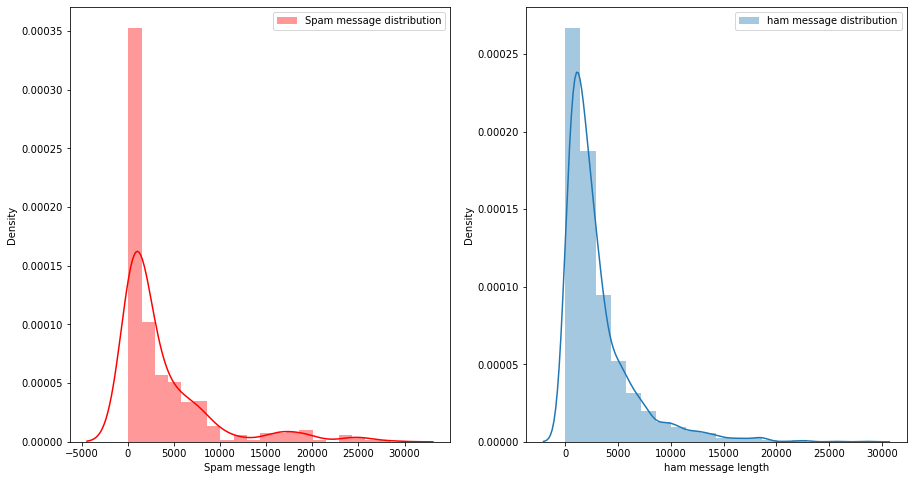

In [30]:
#plotting distribution of original message length of words
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(ds_email[ds_email["label"]==1]["message_length"],bins=20,ax=ax[0],label="Spam message distribution",color="r")

ax[0].set_xlabel("Spam message length")

ax[0].legend()

sns.distplot(ds_email[ds_email["label"]==0]["message_length"],bins=20,ax=ax[1],label="ham message distribution")

ax[1].set_xlabel("ham message length")

ax[1].legend()

plt.show()

### Plotting Distribution of Cleaned Length of Words

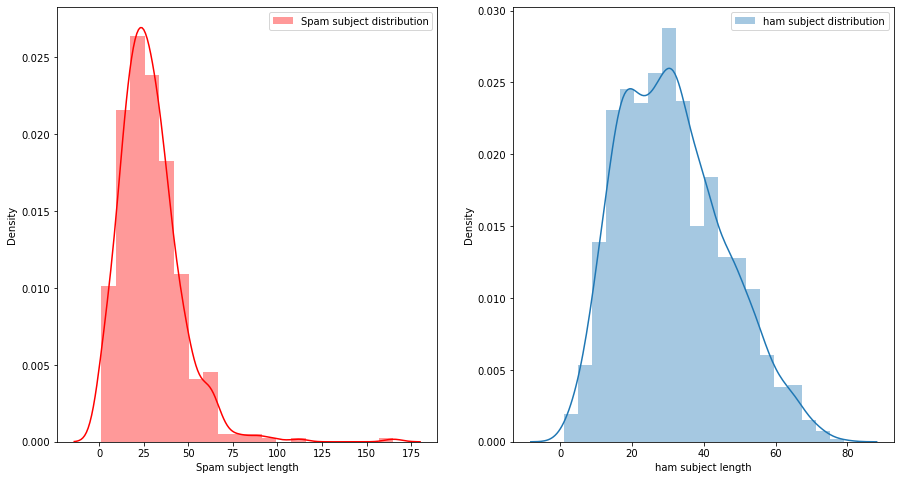

In [31]:
#plotting distribution of cleaned subject length of words
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(ds_email[ds_email["label"]==1]["subject_length_new"],bins=20,ax=ax[0],label="Spam subject distribution",color="r")

ax[0].set_xlabel("Spam subject length")

ax[0].legend()

sns.distplot(ds_email[ds_email["label"]==0]["subject_length_new"],bins=20,ax=ax[1],label="ham subject distribution")

ax[1].set_xlabel("ham subject length")

ax[1].legend()

plt.show()

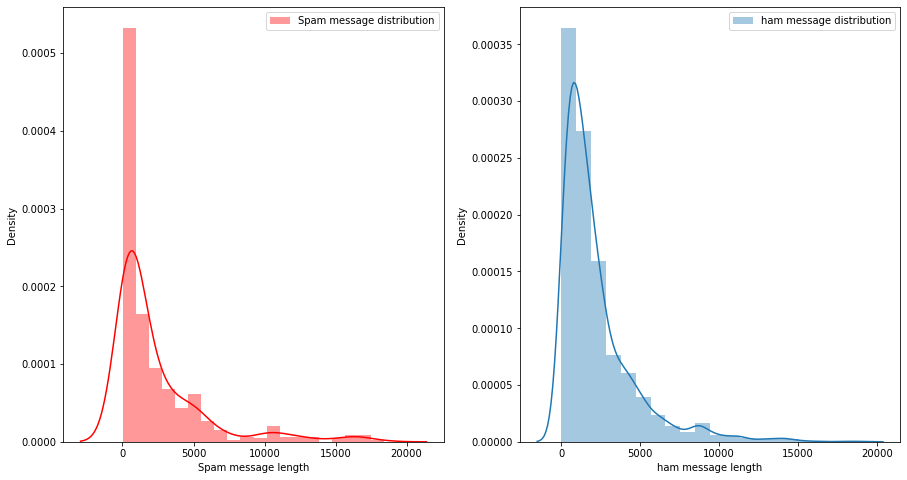

In [32]:
#plotting distribution of original message length of words
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(ds_email[ds_email["label"]==1]["message_length_new"],bins=20,ax=ax[0],label="Spam message distribution",color="r")

ax[0].set_xlabel("Spam message length")

ax[0].legend()

sns.distplot(ds_email[ds_email["label"]==0]["message_length_new"],bins=20,ax=ax[1],label="ham message distribution")

ax[1].set_xlabel("ham message length")

ax[1].legend()

plt.show()

### Creating WordCloud

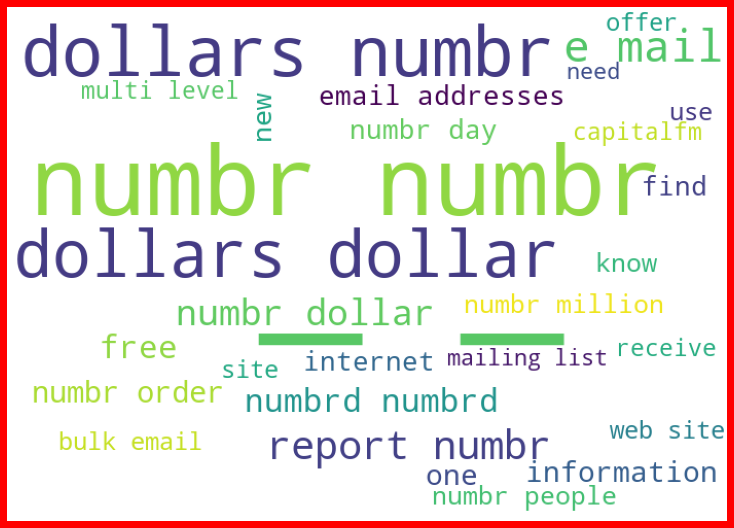

In [33]:
#creating word cloud for the spam mails messages
from wordcloud import WordCloud

spams=ds_email["message"][ds_email["label"]==1]

spam_cloud=WordCloud(width=700,height=500,background_color="white",max_words=30).generate(" ".join(spams))

plt.figure(figsize=(10,8),facecolor="r")

plt.imshow(spam_cloud)

plt.axis("off")

plt.tight_layout(pad=0)

plt.show()

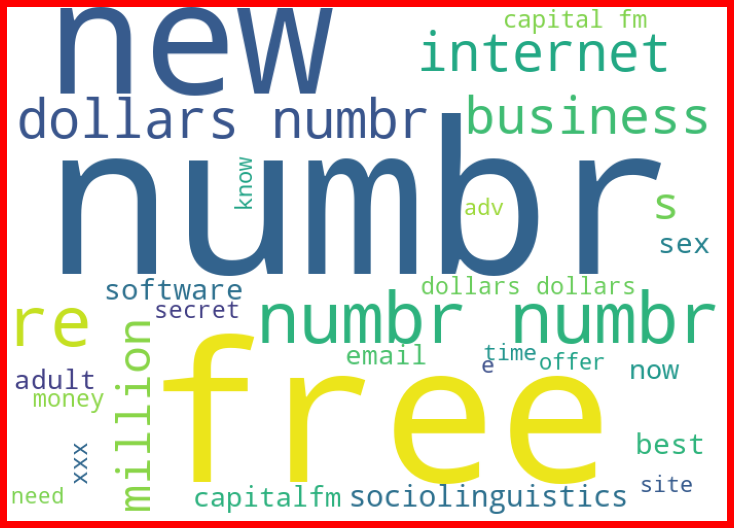

In [34]:
#creating word cloud for the spam mails subject
spams=ds_email["subject"][ds_email["label"]==1]

spam_cloud=WordCloud(width=700,height=500,background_color="white",max_words=30).generate(" ".join(spams))

plt.figure(figsize=(10,8),facecolor="r")

plt.imshow(spam_cloud)

plt.axis("off")

plt.tight_layout(pad=0)

plt.show()

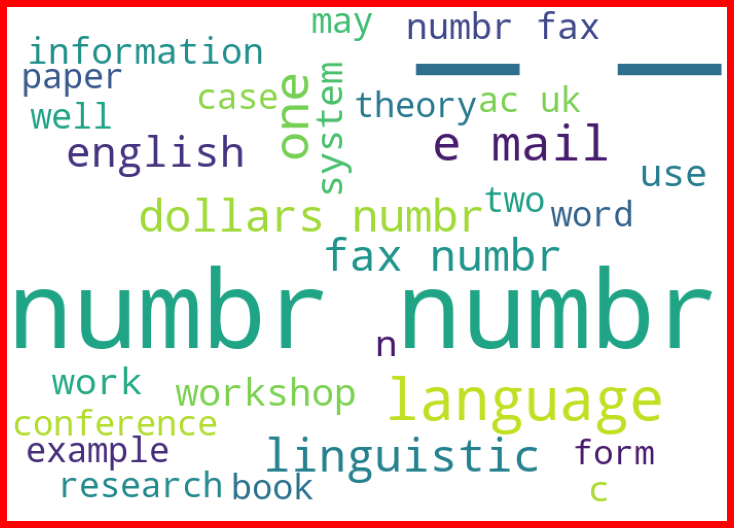

In [35]:
#creating word cloud for the ham mails messages
from wordcloud import WordCloud

hams=ds_email["message"][ds_email["label"]==0]

ham_cloud=WordCloud(width=700,height=500,background_color="white",max_words=30).generate(" ".join(hams))

plt.figure(figsize=(10,8),facecolor="r")

plt.imshow(ham_cloud)

plt.axis("off")

plt.tight_layout(pad=0)

plt.show()

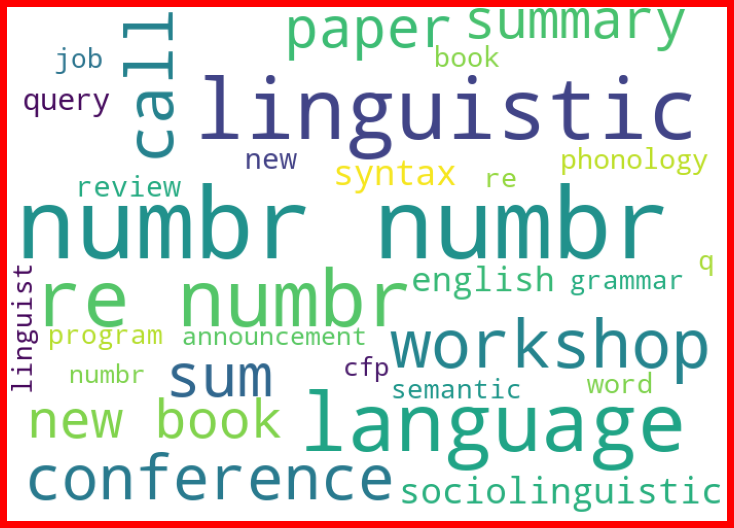

In [36]:
#creating word cloud for the ham mails subject
from wordcloud import WordCloud

hams=ds_email["subject"][ds_email["label"]==0]

ham_cloud=WordCloud(width=700,height=500,background_color="white",max_words=30).generate(" ".join(hams))

plt.figure(figsize=(10,8),facecolor="r")

plt.imshow(ham_cloud)

plt.axis("off")

plt.tight_layout(pad=0)

plt.show()

### Importing Algorithims and Metrices

In [37]:
#important algorithims and metrices
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### Splitting Target and Input Variables

In [38]:
tf_vec=TfidfVectorizer()

naive=MultinomialNB()

features=tf_vec.fit_transform(ds_email["message"],ds_email["subject"])

x=features

y=ds_email["label"]

### Splitting Training and Testing Variables

In [39]:
#traning and predicting
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2169, 54356)
(724, 54356)
(2169,)
(724,)


### Over Sampling Using SMOTE

In [40]:
#value counting column label
ds_email["label"].value_counts()

0    2412
1     481
Name: label, dtype: int64

In [41]:
#importing SMOTE algorithim
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)

x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [42]:
#counting before and after over sampling
from collections import Counter

counter=Counter(y_train)

print("Before",counter)

counter=Counter(y_train_res)

print("After",counter)

Before Counter({0: 1827, 1: 342})
After Counter({0: 1827, 1: 1827})


### Accuracy Score and Cross Val Score

In [43]:
naive.fit(x_train_res,y_train_res)

y_pred=naive.predict(x_test)

print("Accuracy_Score =",accuracy_score(y_test,y_pred))

print("\n")

cross_val= cross_val_score(naive,x,y,cv=10,scoring="accuracy").mean()

print("Cross_val_score=",cross_val)

Accuracy_Score = 0.9834254143646409


Cross_val_score= 0.8589631308913017


### Classification Report

In [44]:
#plotting classification report 
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
    
roc_auc=auc(false_positive_rate,true_positive_rate)

print("roc_auc_score=",roc_auc)
    
print("\n")
    
print("classification_report\n",classification_report(y_test,y_pred))

roc_auc_score= 0.9842587468486749


classification_report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       585
           1       0.93      0.99      0.96       139

    accuracy                           0.98       724
   macro avg       0.96      0.98      0.97       724
weighted avg       0.98      0.98      0.98       724



### Confusion Matrix and ROC AUC Curve

[[575  10]
 [  2 137]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





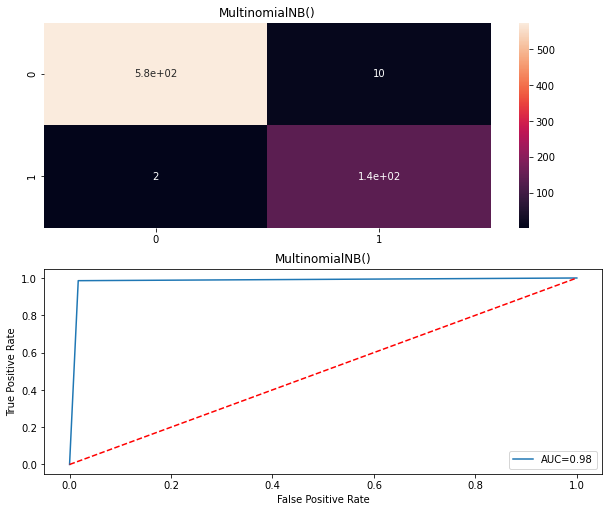

In [45]:
#plotting confusion matrix
cm=confusion_matrix(y_test,y_pred)

print(cm)

print("\n")

plt.figure(figsize=(10,40))

plt.subplot(911)

plt.title(naive)

print(sns.heatmap(cm,annot=True))

plt.subplot(912)

plt.title(naive)

plt.plot(false_positive_rate,true_positive_rate,label="AUC=%0.2f"% roc_auc)

plt.plot([0,1],[0,1],"r--")

plt.legend(loc="lower right")

plt.ylabel("True Positive Rate")

plt.xlabel("False Positive Rate")

print("\n\n")

### Saving Model

In [46]:
import joblib
joblib.dump(naive,"Model_Spam_Detection_Naive.obj")

['Model_Spam_Detection_Naive.obj']

### Loading Model

In [47]:
Model_Spam_Detection=joblib.load("Model_Spam_Detection_Naive.obj")

### Using Model

In [48]:
pd.DataFrame(Model_Spam_Detection.predict(x_test))

,0
0,0
1,0
2,1
3,0
4,0
...,...
719,0
720,0
721,0
722,0
